In [ ]:
import numpy as np
import pandas as pd
import gzip
import os
import tqdm

In [ ]:
import tensorflow as tf


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train = np.reshape(x_train, (-1, 28*28))
x_test = np.reshape(x_test, (-1, 28*28))

**we need to use a scaler. otherwise it will fail**

In [ ]:
x_train_scale =  x_train / 255.0
x_test_scale = x_test / 255.0

In [ ]:
def gradient_one_sample(x, y, theta):
  """
    x: shape (768, 1)
    y: true label (int)
    c: theta# int
  """
  
  grad = np.zeros(theta.shape, dtype=np.float64)
  vec = np.exp(np.dot(x.T , theta))
  vec /= np.sum(vec)
  for c in range(10):
    grad[:, c] += x.reshape((784, )) * (vec[0, c])

  grad[:, y] -= x.reshape((784, ))
  return grad

**Gradient Descend**

In [ ]:
def GD(num_iterations, lr, regularization):
  global theta
  global x_train_scala
  global y_trian
  error_rate = []
  for _ in tqdm.tqdm(range(num_iterations)):
    grad = np.zeros((784, 10), dtype=np.float64)
    for i in range(60000):
      x = x_train_scale[i, :].reshape(784, 1)
      y = y_train[i]
      temp = gradient_one_sample(x, y, theta)
      grad += temp
    grad /= 60000
    grad += 2*regularization*theta
    theta -= lr * grad
    if _ % 500 == 0:
      pred = np.dot(x_test_scale, theta)
      pred = np.argmax(pred, axis=1)
      pred = pred != y_test
      error_rate.append(np.sum(pred) / y_test.shape[0])
  x_axis = list(range(len(error_rate)))
  x_axis = [x * 500 for x in x_axis]
  plt.plot(x_axis, error_rate)
  plt.show()


In [ ]:
theta = np.random.randn(784, 10)
GD(1000, 0.01, 0)

In [ ]:
pred = np.dot(x_test_scale, theta)
pred = np.argmax(pred, axis=1)
pred = pred != y_test
print(np.sum(pred) / y_test.shape[0])

0.858


**SGD**

In [ ]:
import matplotlib.pyplot as plt

def SGD(num_iterations, lr, regularization):
  global theta
  global x_train_scale
  global y_trian
  error_rate = []
  for _ in tqdm.tqdm(range(num_iterations)):
    grad = np.zeros((784, 10), dtype=np.float64)
    i = np.random.randint(0, 60000)
    x = x_train_scale[i].reshape(784, 1)
    y = y_train[i]
    grad += gradient_one_sample(x, y, theta)
    grad += 2*regularization*theta
    theta -= lr * grad
    if _ % 500 == 0:
      pred = np.dot(x_test_scale, theta)
      pred = np.argmax(pred, axis=1)
      pred = pred != y_test
      error_rate.append(np.sum(pred) / y_test.shape[0])
  x_axis = list(range(len(error_rate)))
  x_axis = [x * 500 for x in x_axis]
  plt.plot(x_axis, error_rate)
  plt.show()

  return error_rate



  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 345/100000 [00:00<00:28, 3445.12it/s]

  1%|          | 685/100000 [00:00<00:28, 3429.10it/s]

  1%|          | 1029/100000 [00:00<00:28, 3431.13it/s]

  1%|▏         | 1485/100000 [00:00<00:26, 3706.37it/s]

  2%|▏         | 1822/100000 [00:00<00:27, 3596.48it/s]

  2%|▏         | 2174/100000 [00:00<00:27, 3572.04it/s]

  3%|▎         | 2513/100000 [00:00<00:27, 3514.40it/s]

  3%|▎         | 2955/100000 [00:00<00:25, 3744.14it/s]

  3%|▎         | 3319/100000 [00:00<00:26, 3710.28it/s]

  4%|▎         | 3681/100000 [00:01<00:26, 3668.15it/s]

  4%|▍         | 4042/100000 [00:01<00:26, 3619.63it/s]

  4%|▍         | 4441/100000 [00:01<00:25, 3722.91it/s]

  5%|▍         | 4811/100000 [00:01<00:25, 3709.91it/s]

  5%|▌         | 5181/100000 [00:01<00:25, 3690.42it/s]

  6%|▌         | 5549/100000 [00:01<00:26, 3561.64it/s]

  6%|▌         | 6001/100000 [00:01<00:25, 3647.04it/s]

  6%|▋         | 6458/100000 [00:01<00:24, 3

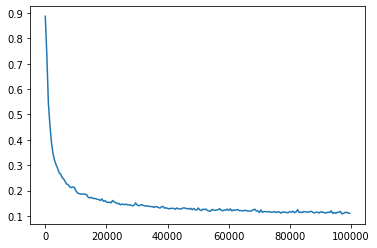

In [ ]:
theta = np.random.randn(784, 10)
error_rate = SGD(100000, 0.01, 0)

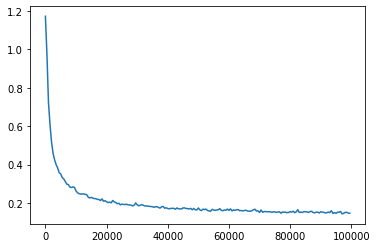

In [ ]:
x_axis = list(range(len(error_rate)))
x_axis = [x * 500 for x in x_axis]

plt.plot(x_axis, error_rate)
plt.show()

In [ ]:
x_test_scale = x_test_scale.reshape((-1, 784))
pred = np.dot(x_test_scale, theta)
pred = np.argmax(pred, axis=1)
pred = pred != y_test
print(np.sum(pred) / y_test.shape[0])

0.1123


AGD

In [ ]:
theta = np.random.randn(784, 10)
def AGD(num_iterations, lr, regularization, sigma):
  global theta
  global x_train_scale
  global y_trian
  _theta_ = theta
  for _ in tqdm.tqdm(range(num_iterations)):
    grad = np.zeros((784, 10), dtype=np.float64)
    for i in range(60000):
      x = x_train_scale[i, :].reshape(784, 1)
      y = y_train[i]
      temp = gradient_one_sample(x, y, theta)
      grad += temp
    grad /= 60000
    grad += 2*regularization*theta
    _theta_new = theta - lr * grad
    theta = (1+sigma) * _theta_new  - sigma*_theta_
    _theta_ = _theta_new
    if _ % 500 == 0:
      pred = np.dot(x_test_scale, theta)
      pred = np.argmax(pred, axis=1)
      pred = pred != y_test
      error_rate.append(np.sum(pred) / y_test.shape[0])
  x_axis = list(range(len(error_rate)))
  x_axis = [x * 500 for x in x_axis]
  plt.plot(x_axis, error_rate)
  plt.show()

In [ ]:
AGD(10, 0.005, 0, -0.5)






  0%|          | 0/10 [00:00<?, ?it/s]




 10%|█         | 1/10 [00:07<01:03,  7.03s/it]




 20%|██        | 2/10 [00:14<00:56,  7.02s/it]




 30%|███       | 3/10 [00:20<00:49,  7.00s/it]




 40%|████      | 4/10 [00:28<00:42,  7.01s/it]




 50%|█████     | 5/10 [00:35<00:35,  7.01s/it]




 60%|██████    | 6/10 [00:43<00:30,  7.51s/it]




 70%|███████   | 7/10 [00:52<00:23,  7.95s/it]




 80%|████████  | 8/10 [01:01<00:16,  8.35s/it]




 90%|█████████ | 9/10 [01:09<00:08,  8.06s/it]




100%|██████████| 10/10 [01:17<00:00,  7.76s/it]


In [ ]:
loss_on_training_set(0)

15.548769025244328

**loss**

In [ ]:
def loss_on_training_set(regularization):
  global theta
  global x_train_scale
  global y_train

  loss = 0
  for i in range(60000):
    x = x_train_scale[i]
    x = x.reshape((784, 1))
    loss += np.log(np.sum(np.exp(np.dot(x.T , theta)))) - np.sum(np.dot(x.T ,  theta[:, y_train[i]]))
  loss /= 60000

  for c in range(10):
    theta_i = theta[:, c].reshape((784, 1))
    loss += regularization * np.sum(np.dot(theta_i.T,  theta_i))

  return loss
  